## Import Necessary Python Libraries

In [1]:
#importing the libraries
import tensorflow as tf  
from tensorflow import keras
import numpy as np
import pandas as pd

## Load the extracted features and process them 

In [2]:
#load the datasets
baseline_df = pd.read_excel('extracted_features_baseline.xlsx')
toolwear_df = pd.read_excel('extracted_features_toolwear.xlsx')

In [3]:
#convert data frame into arrays
good_features = baseline_df.values
bad_features = toolwear_df.values

In [4]:
#train test split to divide the data into training data (70%) and test data (30%)
#This is done on both healthy (good) and toolwear (bad) data

from sklearn.model_selection import train_test_split

good_train, good_test = train_test_split(good_features, test_size=0.2, random_state=40)
bad_train, bad_test = train_test_split(bad_features, test_size=0.2, random_state=40)

In [5]:
#Training data is further split into 70% for model training and 30% for threshold setting

good_train, good_threshold = train_test_split(good_train, test_size=0.3, random_state=40)
bad_train, bad_threshold = train_test_split(bad_train, test_size=0.3, random_state=40)

In [6]:
#data scalling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
good_train = sc.fit_transform(good_train)
good_test = sc.transform(good_test)
good_threshold = sc.transform(good_threshold)
bad_train = sc.fit_transform(bad_train)
bad_test = sc.transform(bad_test)
bad_threshold = sc.transform(bad_threshold)

In [7]:
combine_test = np.vstack([good_test , bad_test])

## Autoencoder Construction

### Autoencoder for healthy features (good autoencoder)

In [8]:
#specify the number of condensed features. This will be the number of neurons in the hidden layer
condensed_f = 20

In [9]:
#constructing the good autoencoder model

#input layer which number of neurons equals the number of original features
l_in_good = keras.Input(good_features.shape[1])

#hidden layer which condenses the feature into the specified number of condensed features
l_condensed_good = keras.layers.Dense(condensed_f)(l_in_good)

#output layer which is the same as the input
l_out_good = keras.layers.Dense(good_features.shape[1])(l_condensed_good)

In [10]:
#defining the good autoencoder
autoencoder_good = keras.Model(l_in_good, l_out_good)

In [11]:
autoencoder_good.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 66)]              0         
                                                                 
 dense (Dense)               (None, 20)                1340      
                                                                 
 dense_1 (Dense)             (None, 66)                1386      
                                                                 
Total params: 2726 (10.65 KB)
Trainable params: 2726 (10.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Autoencoder for toolwear features (bad autoencoder)

In [12]:
#constructing the bad autoencoder model

#input layer which number of neurons equals the number of original features
l_in_bad = keras.Input(bad_features.shape[1])

#hidden layer which condenses the feature into the specified number of condensed features
l_condensed_bad = keras.layers.Dense(condensed_f)(l_in_bad)

#output layer which is the same as the input
l_out_bad = keras.layers.Dense(good_features.shape[1])(l_condensed_bad)

In [13]:
#defining the bad autoencoder
autoencoder_bad = keras.Model(l_in_bad, l_out_bad)

In [14]:
autoencoder_bad.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 66)]              0         
                                                                 
 dense_2 (Dense)             (None, 20)                1340      
                                                                 
 dense_3 (Dense)             (None, 66)                1386      
                                                                 
Total params: 2726 (10.65 KB)
Trainable params: 2726 (10.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Autoencoder Training

### Good Autoencoder (GAE) is fitted with healthy features in the training dataset

In [15]:
#compile the model
autoencoder_good.compile(optimizer='adam', loss='mse')
#train the model
autoencoder_good.fit(good_train, good_train, epochs = 50, batch_size = 8, validation_split = 0.1)


Epoch 1/50

27/27 [==============================] - 1s 13ms/step - loss: 1.3797 - val_loss: 1.2468
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 1.0262 - val_loss: 0.9893
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.8301 - val_loss: 0.8198
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6924 - val_loss: 0.6925
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5926 - val_loss: 0.6058
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5188 - val_loss: 0.5415
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.4670 - val_loss: 0.4929
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.4213 - val_loss: 0.4525
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.3849 - val_loss: 0.4153
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.3506 - val_loss: 0.3845
Epoch 11/50
27/2

### Bad Autoencoder (BAE) is fitted with toolwear features in the training dataset

In [16]:
#compile the model
autoencoder_bad.compile(optimizer='adam', loss='mse')
#train the model
autoencoder_bad.fit(bad_train, bad_train, epochs = 50, batch_size = 8, validation_split = 0.1)

Epoch 1/50
27/27 [==============================] - 1s 12ms/step - loss: 1.3189 - val_loss: 1.1886
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.9361 - val_loss: 0.9232
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.7245 - val_loss: 0.7330
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 0.5765 - val_loss: 0.5901
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.4737 - val_loss: 0.4960
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.4045 - val_loss: 0.4347
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.3565 - val_loss: 0.3923
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.3217 - val_loss: 0.3580
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.2940 - val_loss: 0.3307
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.2726 - val_loss: 0.3107
Epoch 11/50
27/27 

## Testing the Autoencoders with Threshold Datasets for both healthy and toolwear features to determine the threshold for classification

In [17]:
from sklearn.metrics import mean_absolute_error

#Testing the good autoencoder with healthy datasets
GAE_pred_good = autoencoder_good.predict(good_threshold)
print(mean_absolute_error(good_threshold,GAE_pred_good))

4/4 [==============================] - 0s 2ms/step
0.22003999693790322


In [18]:
#Testing the good autoencoder with toolwear datasets
GAE_pred_bad = autoencoder_good.predict(bad_threshold)
print(mean_absolute_error(bad_threshold,GAE_pred_bad))

4/4 [==============================] - 0s 2ms/step
0.48120671119111247


In [19]:
#Testing the bad autoencoder with healthy datasets
BAE_pred_good = autoencoder_bad.predict(good_threshold)
print(mean_absolute_error(good_threshold,BAE_pred_good))

4/4 [==============================] - 0s 3ms/step
0.44380762844704685


In [20]:
#Testing the bad autoencoder with healthy datasets
BAE_pred_bad = autoencoder_bad.predict(bad_threshold)
print(mean_absolute_error(bad_threshold,BAE_pred_bad))

4/4 [==============================] - 0s 3ms/step
0.19736847225720194


## Visualisation of Mean Square Error (MSE) of Threshold Dataset

### Good Autoencoder

In [21]:
#Record the MSE of each entry in the threshold dataset in an array to be used for plotting after

GAE_MSE_toolwear = []
GAE_MSE_healthy = []


for i in range(len(bad_threshold)):
    GAE_MSE_healthy.append(mean_absolute_error(good_threshold[i],GAE_pred_good[i]))
    GAE_MSE_toolwear.append(mean_absolute_error(bad_threshold[i],GAE_pred_bad[i]))

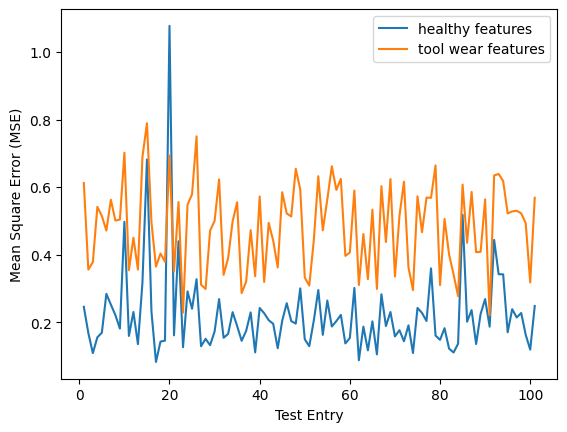

In [22]:
import matplotlib.pyplot as plt 

#create index for x axis
index = list(range(1,(len(bad_threshold)+1)))

# plot lines 
plt.plot(index, GAE_MSE_healthy, label = "healthy features") 
plt.plot(index, GAE_MSE_toolwear, label = "tool wear features") 
plt.xlabel("Test Entry")
plt.ylabel("Mean Square Error (MSE)")
plt.legend(loc='upper right') 
plt.show()

### Bad Autoencoder

In [23]:
#Record the MSE of each entry in the threshold dataset in an array to be used for plotting after

BAE_MSE_toolwear = []
BAE_MSE_healthy = []

for i in range(len(bad_threshold)):
    BAE_MSE_healthy.append(mean_absolute_error(good_threshold[i],BAE_pred_good[i]))
    BAE_MSE_toolwear.append(mean_absolute_error(bad_threshold[i],BAE_pred_bad[i]))

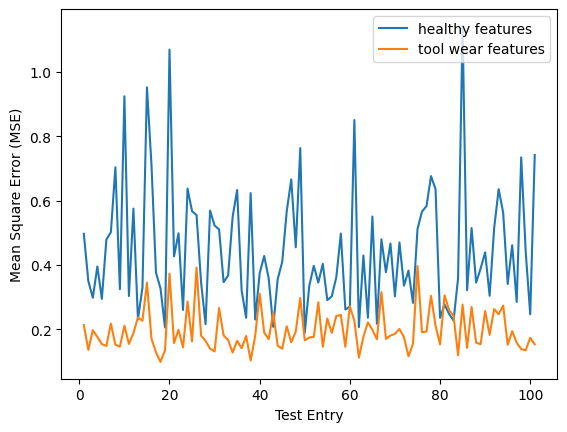

In [24]:
import matplotlib.pyplot as plt 

#create index for x axis
index = list(range(1,(len(bad_threshold)+1)))

# plot lines 
plt.plot(index, BAE_MSE_healthy, label = "healthy features") 
plt.plot(index, BAE_MSE_toolwear, label = "tool wear features") 
plt.xlabel("Test Entry")
plt.ylabel("Mean Square Error (MSE)")
plt.legend(loc='upper right') 
plt.show()

## Applying Moving Average Filter

### Good Autoencoder

In [25]:
#defning the window size of the filter
window_size = 10
GAE_average_healthy = []
GAE_average_toolwear = []

#Instead of the MSE of individual entries, the average MSE in a window is calculated and added into the array for the plot
for ind in range(len(GAE_MSE_healthy) - window_size + 1):
    GAE_average_healthy.append(np.mean(GAE_MSE_healthy[ind:ind+window_size]))
    GAE_average_toolwear.append(np.mean(GAE_MSE_toolwear[ind:ind+window_size]))

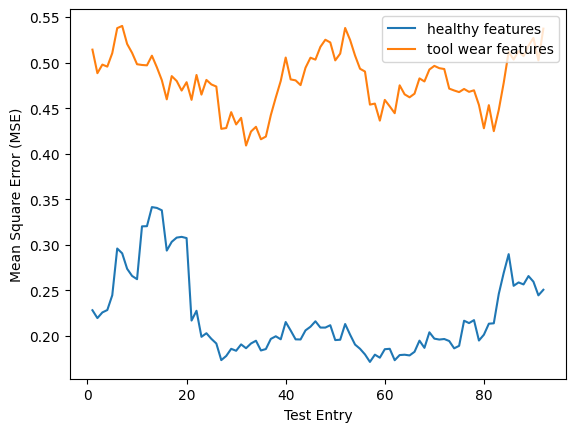

In [26]:
test_entries = list(range(1,len(GAE_average_healthy)+1))

# plot lines 
plt.plot(test_entries, GAE_average_healthy, label = "healthy features") 
plt.plot(test_entries, GAE_average_toolwear, label = "tool wear features") 
plt.xlabel("Test Entry")
plt.ylabel("Mean Square Error (MSE)")
plt.legend(loc='upper right') 
plt.show()

### Bad Autoencoder

In [27]:
#defning the window size of the filter
window_size = 10
BAE_average_healthy = []
BAE_average_toolwear = []

#Instead of the MSE of individual entries, the average MSE in a window is calculated and added into the array for the plot
for ind in range(len(BAE_MSE_healthy) - window_size + 1):
    BAE_average_healthy.append(np.mean(BAE_MSE_healthy[ind:ind+window_size]))
    BAE_average_toolwear.append(np.mean(BAE_MSE_toolwear[ind:ind+window_size]))

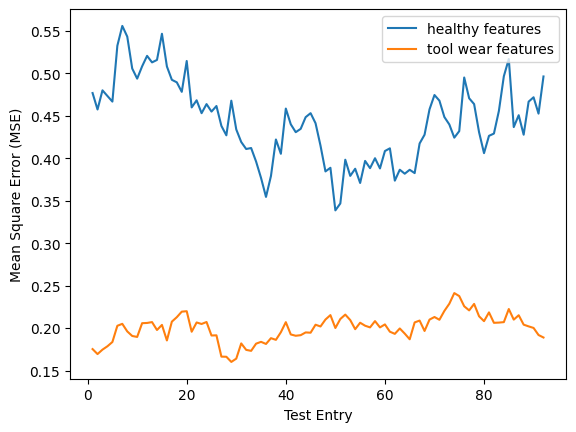

In [28]:
index = list(range(1,len(BAE_average_healthy)+1))

# plot lines 
plt.plot(index, BAE_average_healthy, label = "healthy features") 
plt.plot(index, BAE_average_toolwear, label = "tool wear features") 
plt.xlabel("Test Entry")
plt.ylabel("Mean Square Error (MSE)")
plt.legend(loc='upper right') 
plt.show()

## Determining the MSE threshold for classification from test result

In [29]:
#Threshold is determined as the mid point 

#Threshold for good autoencoder
GAE_threshold = max(GAE_average_healthy) + (min(GAE_average_toolwear) - max(GAE_average_healthy))/2
print(GAE_threshold)

#Threshold for bad autoencoder
BAE_threshold = max(BAE_average_toolwear) + (min(BAE_average_healthy) - max(BAE_average_toolwear))/2
print(BAE_threshold)

0.37520191640790823
0.2899028862592756


## Predicting in Production Environment (Assuming data input is real time)

### Test data is used for demonstration as the models have not seen these data before

In [30]:
#Moving average filter is also applied to the data. 
#To implement this 10 data entries are inputted into the model in each iteration. 
#The MSE from each iteration is compared with the threshold to determine the state of toolwear

import time 
import timeit
window_size = 10
result = []
MSE_GAE = []
MSE_BAE = []
time_passed = 0


for j in range (0, combine_test.shape[0] - window_size):
    #prediction process starts so record start time
    start = time.time()

    #the autoencoders are inputted with all the entries in the filter window and asked to reconstruct the features of all the entries
    gae_pred = autoencoder_good.predict(combine_test[j: j + window_size])
    bae_pred = autoencoder_bad.predict(combine_test[j: j + window_size])

    #The average MSE of all the entries in the filter window is determined
    gae_error = mean_absolute_error(combine_test[j: j + window_size],gae_pred)
    bae_error = mean_absolute_error(combine_test[j: j + window_size],bae_pred)

    #The average MSE of the window is compared with the threshold for classification
    if ((gae_error < GAE_threshold) and (bae_error > BAE_threshold)):
        result.append("healthy")
    elif ((gae_error > GAE_threshold) and (bae_error < BAE_threshold)):
        result.append("toolwear")
    else:
        result.append("anomaly")
        
    #prediction process ends so record end time
    end = time.time()
    time_passed = time_passed + (end-start)

    #Appending the MSE into an array so it can be used for plotting later
    MSE_GAE.append(gae_error)
    MSE_BAE.append(bae_error)

1/1 [==============================] - 0s 21ms/step


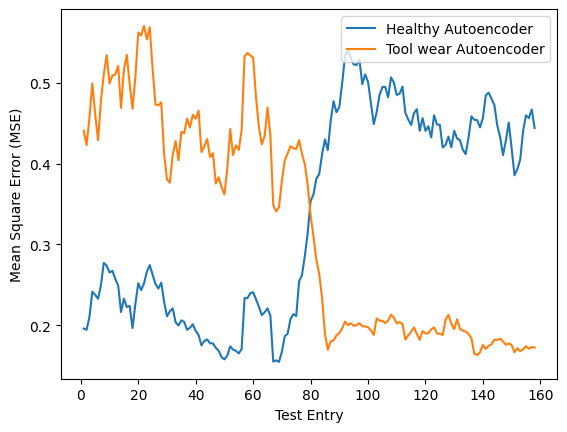

In [31]:
test_entries = list(range(1,len(MSE_BAE)+1))

# plot lines 
plt.plot(test_entries, MSE_GAE, label = "Healthy Autoencoder") 
plt.plot(test_entries, MSE_BAE, label = "Tool wear Autoencoder") 
plt.xlabel("Test Entry")
plt.ylabel("Mean Square Error (MSE)")
plt.legend(loc='upper right') 
plt.show()

In [32]:
#The predicted class of tool wear is printed
print(result)

['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'toolwear', 'toolwear', 'toolwear', 'toolwear', 'toolwear', 'toolwear', 'toolwear', 'toolwear', 'toolwear', 

## Timing Analysis

In [33]:
print(time_passed)

24.597632884979248


In [34]:
# The average time is calculated by dividing the total time with the number of predictions
avg_time = time_passed / len(result)
print(avg_time)

0.1556812207910079
